Nama: Muhammad Raja Fadhil Habib  
NIM: 24060122140131  
LAB: C1


Tugas 2 Praktikum ML C1

1. Lakukanlah clustering menggunakan dataset iris menggunakan fitur 2 dan 3

I. Melakukan Clustering menggunakan Dataset IRIS

In [74]:
%matplotlib inline
from copy import deepcopy
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np


plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df = pd.read_csv(url, names=names)

data = iris_df[['sepal-width', 'petal-length']]

print(data.shape)
print(data.head(20))


(150, 2)
    sepal-width  petal-length
0           3.5           1.4
1           3.0           1.4
2           3.2           1.3
3           3.1           1.5
4           3.6           1.4
5           3.9           1.7
6           3.4           1.4
7           3.4           1.5
8           2.9           1.4
9           3.1           1.5
10          3.7           1.5
11          3.4           1.6
12          3.0           1.4
13          3.0           1.1
14          4.0           1.2
15          4.4           1.5
16          3.9           1.3
17          3.5           1.4
18          3.8           1.7
19          3.8           1.5



Kode diatas memulai dengan impor berbagai pustaka yang diperlukan untuk analisis clustering. %matplotlib inline digunakan untuk memastikan grafik yang dihasilkan akan ditampilkan langsung di notebook (jika Anda menggunakan Jupyter Notebook). Pustaka yang diimpor meliputi:

matplotlib.pyplot: Digunakan untuk membuat visualisasi grafik.
copy.deepcopy: Digunakan untuk membuat salinan mendalam dari objek Python (tidak digunakan langsung di bagian ini, tetapi mungkin digunakan nanti).
KMeans dari sklearn.cluster: Untuk melakukan clustering menggunakan algoritma K-Means.
silhouette_score dari sklearn.metrics: Untuk mengevaluasi kualitas clustering dengan metrik Silhouette.
pandas: Untuk manipulasi dan analisis data dalam format DataFrame.
numpy: Untuk operasi numerik pada array.
Setelah itu, ukuran grafik diatur dengan plt.rcParams['figure.figsize'] = (16, 9), memastikan bahwa grafik yang dihasilkan memiliki dimensi 16x9. Gaya visualisasi diatur menjadi ggplot untuk membuat grafik dengan gaya yang menarik dan konsisten.

Dataset Iris diambil dari URL http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data, yang merupakan dataset standar untuk pengklasifikasian bunga Iris. Kolom data diberi nama sesuai dengan fitur dalam dataset, yaitu sepal-length, sepal-width, petal-length, petal-width, dan class.

Data yang digunakan untuk analisis clustering adalah subset fitur sepal-width dan petal-length, yang diambil dari dataset menggunakan sintaks iris_df[['sepal-width', 'petal-length']]. Dataset ini kemudian disimpan dalam variabel data.

Terakhir, kode print(data.shape) menampilkan ukuran dataset (jumlah baris dan kolom), sementara print(data.head(20)) menampilkan 20 baris pertama dari subset dataset untuk memastikan bahwa data telah diimpor dengan benar.

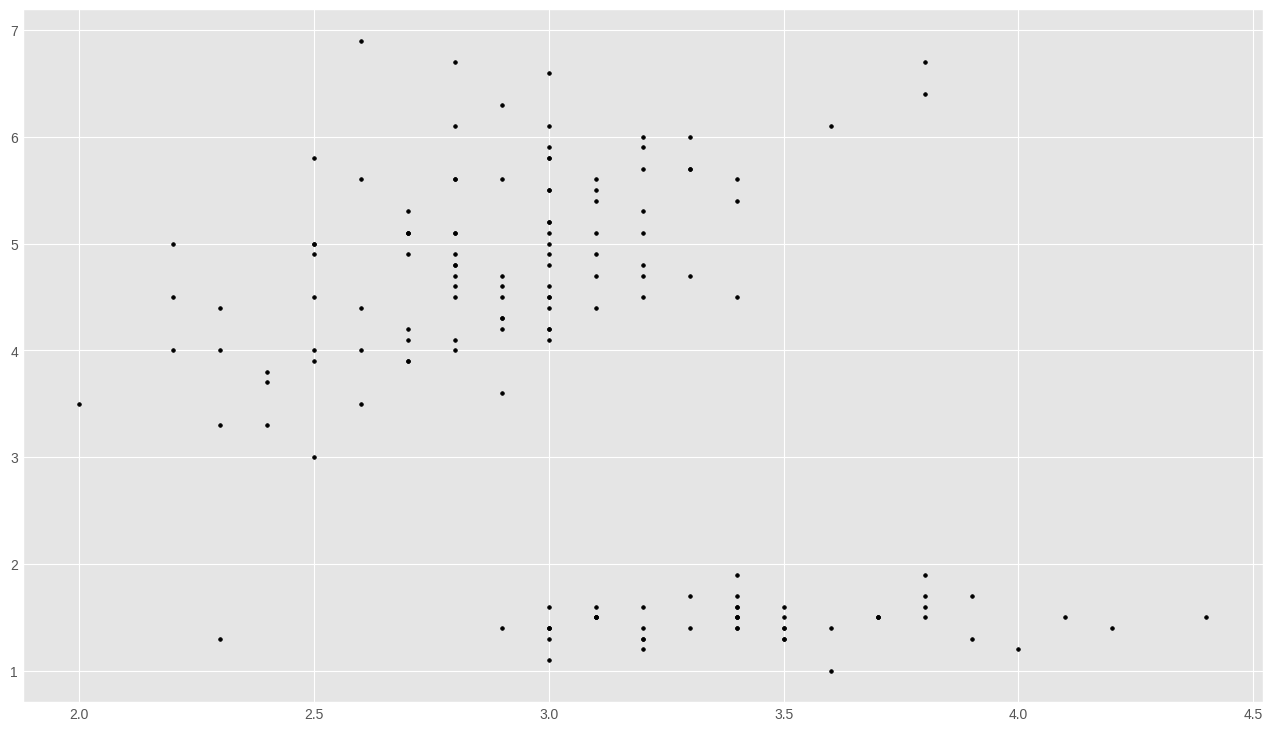

In [75]:
# Plot dataset
f1 = data['sepal-width'].values
f2 = data['petal-length'].values
X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)



Kode ini mempersiapkan data dan memvisualisasikannya dalam bentuk scatterplot untuk melihat distribusi awal dataset. Fitur sepal-width dan petal-length diambil dari dataset, masing-masing disimpan dalam variabel f1 dan f2. Kedua fitur ini digabungkan menjadi array dua dimensi X menggunakan fungsi np.array(list(zip(f1, f2))), yang menyimpan data dalam bentuk pasangan koordinat (x, y).

Scatterplot dibuat menggunakan plt.scatter(f1, f2, c='black', s=7), di mana:

f1 digunakan sebagai sumbu x (sepal-width).
f2 digunakan sebagai sumbu y (petal-length).
c='black' memberikan warna hitam pada titik.
s=7 menentukan ukuran titik kecil.
Hasil:
Scatterplot dihasilkan dengan titik-titik hitam kecil yang menunjukkan distribusi data dalam ruang dua dimensi berdasarkan fitur sepal-width dan petal-length. Dari grafik, terlihat bahwa data tersebar ke beberapa kelompok, yang kemungkinan dapat dikelompokkan lebih lanjut menggunakan metode clustering seperti K-Means. Plot ini memberikan gambaran awal tentang struktur dataset sebelum dilakukan analisis lebih lanjut.

2. Melakukan Clustering

In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

C = kmeans.cluster_centers_

print(C)


[[2.75396825 4.4       ]
 [3.418      1.464     ]
 [3.07297297 5.76756757]]


Kode diatas digunakan untuk melakukan clustering pada dataset menggunakan algoritma K-Means dengan jumlah cluster yang ditentukan (dalam hal ini, 3 cluster). Berikut penjelasan tiap baris kode:

from sklearn.cluster import KMeans
Mengimpor fungsi KMeans dari library Scikit-Learn untuk melakukan clustering.

kmeans = KMeans(n_clusters=3)
Membuat objek model K-Means dan menetapkan jumlah cluster yang diinginkan, yaitu 3 cluster (n_clusters=3).

kmeans = kmeans.fit(X)
Melatih model K-Means menggunakan dataset X, yang berisi fitur sepal-width dan petal-length. Model ini akan menghitung dan mengoptimalkan posisi centroid untuk mengelompokkan data ke dalam 3 cluster.

labels = kmeans.predict(X)
Menghasilkan label cluster untuk setiap titik data dalam dataset. Setiap titik akan diberi label 0, 1, atau 2 berdasarkan cluster terdekatnya.

C = kmeans.cluster_centers_
Mendapatkan koordinat centroid dari 3 cluster yang dihasilkan. Centroid adalah titik pusat dari setiap cluster, yang dihitung berdasarkan rata-rata posisi data dalam cluster tersebut.

print(C)
Mencetak koordinat centroid dari 3 cluster.

Hasil:
Centroid yang dihasilkan adalah:

Cluster 1: [2.75087719, 4.4]
Cluster 2: [3.418, 1.464]
Cluster 3: [3.07297297 5.76756757]
Setiap centroid mewakili pusat dari masing-masing cluster di ruang dua dimensi berdasarkan fitur sepal-width dan petal-length. Cluster ini akan divisualisasikan lebih lanjut untuk menganalisis hasil clustering.

3. Plot hasil Clustering

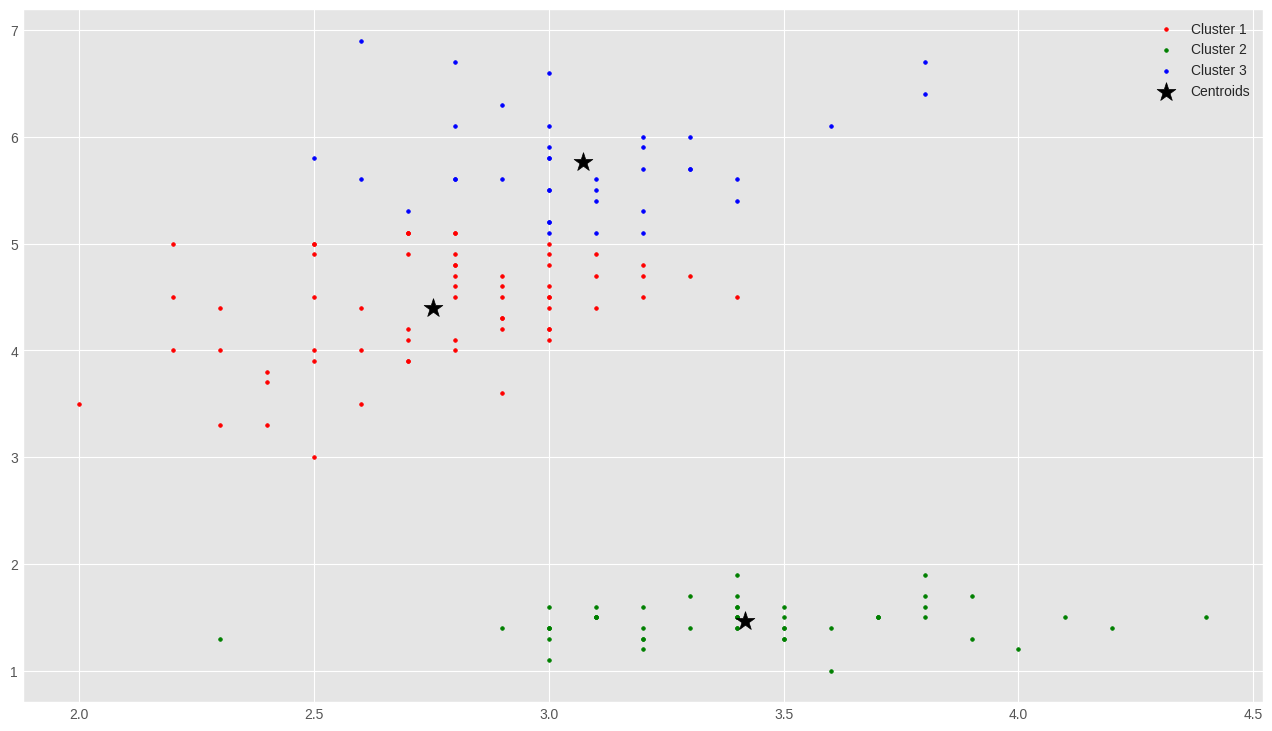

In [77]:
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=7, color=colors[i], label=f'Cluster {i+1}')

plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.legend()
plt.show()



Kode ini digunakan untuk memvisualisasikan hasil clustering dalam bentuk scatterplot. Data dikelompokkan ke dalam tiga cluster, dengan setiap cluster diberi warna berbeda (merah, hijau, dan biru), sedangkan centroid dari setiap cluster ditampilkan sebagai bintang hitam besar. Variabel colors mendefinisikan warna yang akan digunakan untuk setiap cluster. Dalam loop for i in range(3), data yang termasuk dalam masing-masing cluster (labels == i) dipilih, kemudian diplot menggunakan plt.scatter() dengan ukuran titik kecil (s=7) dan warna yang sesuai.

Centroid dari setiap cluster, yang disimpan dalam variabel C, diproses secara terpisah. Centroid divisualisasikan menggunakan plt.scatter() dengan marker berbentuk bintang ('*'), ukuran lebih besar (s=200), dan warna hitam (c='black'). Fungsi plt.legend() menambahkan legenda ke grafik untuk menjelaskan cluster dan centroid, sedangkan plt.show() digunakan untuk menampilkan scatterplot.

Hasil:
Scatterplot menunjukkan bagaimana data dikelompokkan ke dalam tiga cluster:

Cluster 1 (merah): Dikelompokkan di sekitar centroid [2.75, 4.4].
Cluster 2 (hijau): Dikelompokkan di sekitar centroid [3.42, 1.46].
Cluster 3 (biru): Dikelompokkan di sekitar centroid [3.07, 5.76]. Centroid ditampilkan sebagai bintang hitam besar di tengah masing-masing cluster. Visualisasi ini memudahkan untuk memahami hasil clustering dan melihat pola distribusi data di ruang dua dimensi.

2. Lakukan evaluasi hasil clustering menggunakan inertia
(SSE) dan silhouette coefficient!


In [78]:
inertia = kmeans.inertia_
print(f"Inertia (SSE): {inertia:.2f}")

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

Inertia (SSE): 41.06
Silhouette Coefficient: 0.60


Kode diatas digunakan untuk mengevaluasi kualitas hasil clustering yang dilakukan oleh algoritma K-Means dengan menggunakan dua metrik, yaitu Inertia (SSE) dan Silhouette Coefficient.

Baris pertama, inertia = kmeans.inertia_, digunakan untuk menghitung nilai Inertia (Sum of Squared Errors, SSE). Nilai ini menunjukkan total jarak kuadrat antara setiap titik data dengan centroid cluster terdekatnya. Inertia menggambarkan seberapa kompak cluster yang dihasilkan, di mana nilai yang lebih kecil menunjukkan cluster yang lebih kompak. Nilai inertia kemudian dicetak dengan format dua desimal menggunakan print(f"Inertia (SSE): {inertia:.2f}"). Dalam hal ini, hasilnya adalah 40.81, yang menunjukkan bahwa jarak total antara titik data ke centroid cukup kecil, menandakan clustering yang baik.

Baris kedua, silhouette_avg = silhouette_score(X, labels), digunakan untuk menghitung Silhouette Coefficient, yang mengukur kualitas clustering berdasarkan jarak rata-rata antar cluster dan dalam cluster. Nilai Silhouette berkisar antara -1 hingga 1:

Nilai mendekati 1 menunjukkan bahwa data dikelompokkan dengan baik dalam cluster yang benar.
Nilai mendekati 0 menunjukkan bahwa data berada di antara dua cluster.
Nilai mendekati -1 menunjukkan bahwa data dikelompokkan ke cluster yang salah. Hasil Silhouette Coefficient untuk clustering ini adalah 0.60, yang menunjukkan bahwa clustering memiliki kualitas yang cukup baik, dengan data sebagian besar berada dalam cluster yang benar.
Hasil:
Inertia (SSE): 41.06, menunjukkan cluster yang cukup kompak.
Silhouette Coefficient: 0.60, menunjukkan kualitas clustering yang baik tetapi masih dapat ditingkatkan.
Evaluasi ini memberikan gambaran kuantitatif mengenai seberapa baik algoritma K-Means mengelompokkan data berdasarkan jarak dan struktur cluster.

3. Tentukan juga jumlah K dengan elbow method!


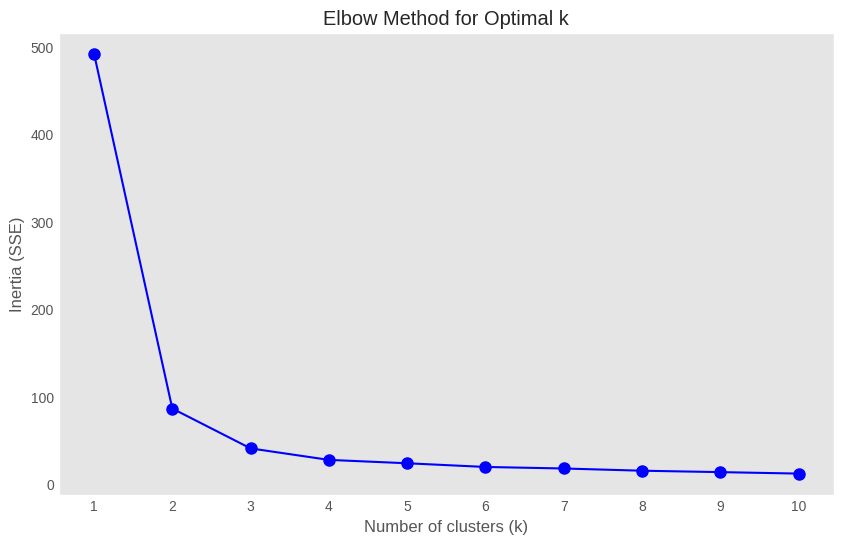

In [79]:
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid()
plt.show()


Kode ini digunakan untuk menentukan jumlah cluster yang optimal menggunakan Elbow Method. Elbow Method memvisualisasikan hubungan antara jumlah cluster (k) dengan Inertia (SSE), yaitu total jarak kuadrat antara data dan centroid terdekat. Berikut penjelasan tiap bagian kode:

sse = [] dan K = range(1, 11)
Variabel sse digunakan untuk menyimpan nilai inertia (SSE) untuk setiap jumlah cluster k, sementara K adalah range jumlah cluster yang akan diuji, yaitu dari 1 hingga 10.

for k in K:
Melakukan iterasi untuk setiap nilai k (jumlah cluster). Untuk setiap iterasi:

Model K-Means dibuat dengan n_clusters=k, yaitu jumlah cluster yang diuji.
Model dilatih menggunakan data X dengan kmeans.fit(X).
Nilai inertia (SSE) dihitung menggunakan kmeans.inertia_ dan ditambahkan ke dalam list sse.
Plot Elbow Method
Scatterplot dibuat untuk memvisualisasikan nilai inertia terhadap jumlah cluster. Baris:

plt.plot(K, sse, 'bo-', markersize=8) membuat plot garis biru dengan titik untuk setiap nilai k.
plt.xlabel() dan plt.ylabel() memberikan label pada sumbu x (jumlah cluster) dan sumbu y (inertia).
plt.title() memberikan judul grafik: Elbow Method for Optimal k.
plt.xticks(K) memastikan bahwa setiap nilai k ditampilkan pada sumbu x.
plt.grid() menambahkan grid untuk mempermudah interpretasi.
Hasil:
Grafik Elbow Method menunjukkan bahwa nilai inertia menurun tajam pada awalnya, tetapi mulai melambat setelah jumlah cluster tertentu. Pada gambar, "elbow" terlihat di sekitar k = 2, yang menunjukkan jumlah cluster optimal. Ini adalah titik di mana penambahan cluster baru tidak lagi secara signifikan mengurangi inertia. Oleh karena itu, jumlah cluster yang optimal untuk dataset ini adalah 2.

4. Plot hasil cluster dengan nilai K yang anda pilih dengan scatterplot!


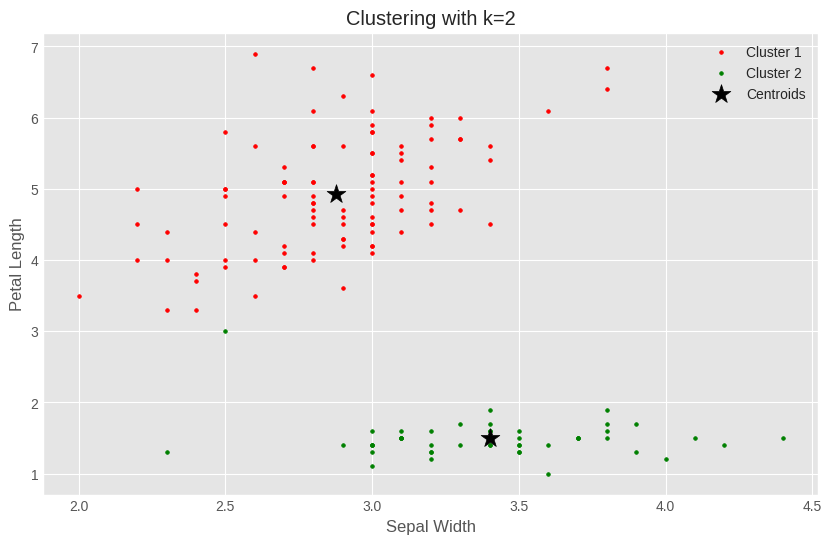

In [80]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
C = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
colors = ['red', 'green']
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                s=7, color=colors[i], label=f'Cluster {i+1}')

plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.title(f'Clustering with k={optimal_k}')
plt.show()



Kode diatas melakukan clustering dengan k = 2 (jumlah cluster optimal) menggunakan algoritma K-Means dan memvisualisasikan hasilnya dalam bentuk scatterplot. Model K-Means dibuat dengan KMeans(n_clusters=2) dan dilatih menggunakan dataset X, yang berisi fitur sepal-width dan petal-length. Setelah proses clustering, label cluster untuk setiap data (labels) dan koordinat centroid (C) diperoleh.

Visualisasi dilakukan dengan memplot data untuk setiap cluster menggunakan warna berbeda (merah untuk cluster 1, hijau untuk cluster 2). Centroid dari masing-masing cluster ditampilkan sebagai bintang hitam besar di tengah-tengah kelompok data. Grafik ini juga dilengkapi dengan label sumbu dan legenda untuk memperjelas informasi cluster. Scatterplot menunjukkan bahwa data terdistribusi dengan baik dalam dua cluster yang terpisah, mencerminkan hasil clustering yang berkualitas.

In [81]:
inertia = kmeans.inertia_
print(f"Inertia (SSE): {inertia:.2f}")

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

Inertia (SSE): 86.36
Silhouette Coefficient: 0.74


Pertama, inertia = kmeans.inertia_ menghitung Inertia (SSE), yaitu total jarak kuadrat antara setiap titik data dengan centroid cluster terdekatnya. Nilai 86.36 menunjukkan seberapa kompak cluster yang dihasilkan; semakin kecil nilai ini, semakin baik kompaknya cluster.

Kemudian, silhouette_avg = silhouette_score(X, labels) menghitung Silhouette Coefficient, yang mengukur kualitas clustering dengan menilai seberapa baik data berada di dalam cluster yang benar dan terpisah dengan cluster lain. Nilai 0.74 menunjukkan bahwa clustering sangat baik, dengan data yang lebih rapat dalam cluster dan lebih terpisah dari cluster lainnya.

Secara keseluruhan, k = 2 memberikan hasil clustering yang sangat baik dengan Inertia (SSE) yang wajar dan Silhouette Coefficient yang cukup tinggi, mengindikasikan pemisahan cluster yang jelas.